In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_column', None)

pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [13]:
bike_df = pd.read_csv("C:/Users/iamsa/Downloads/day.csv")

In [4]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
drop_these_columns = ["instant","dteday"]
bike_df.drop(drop_these_columns, inplace=True, axis=1)
bike_df.shape

(730, 14)

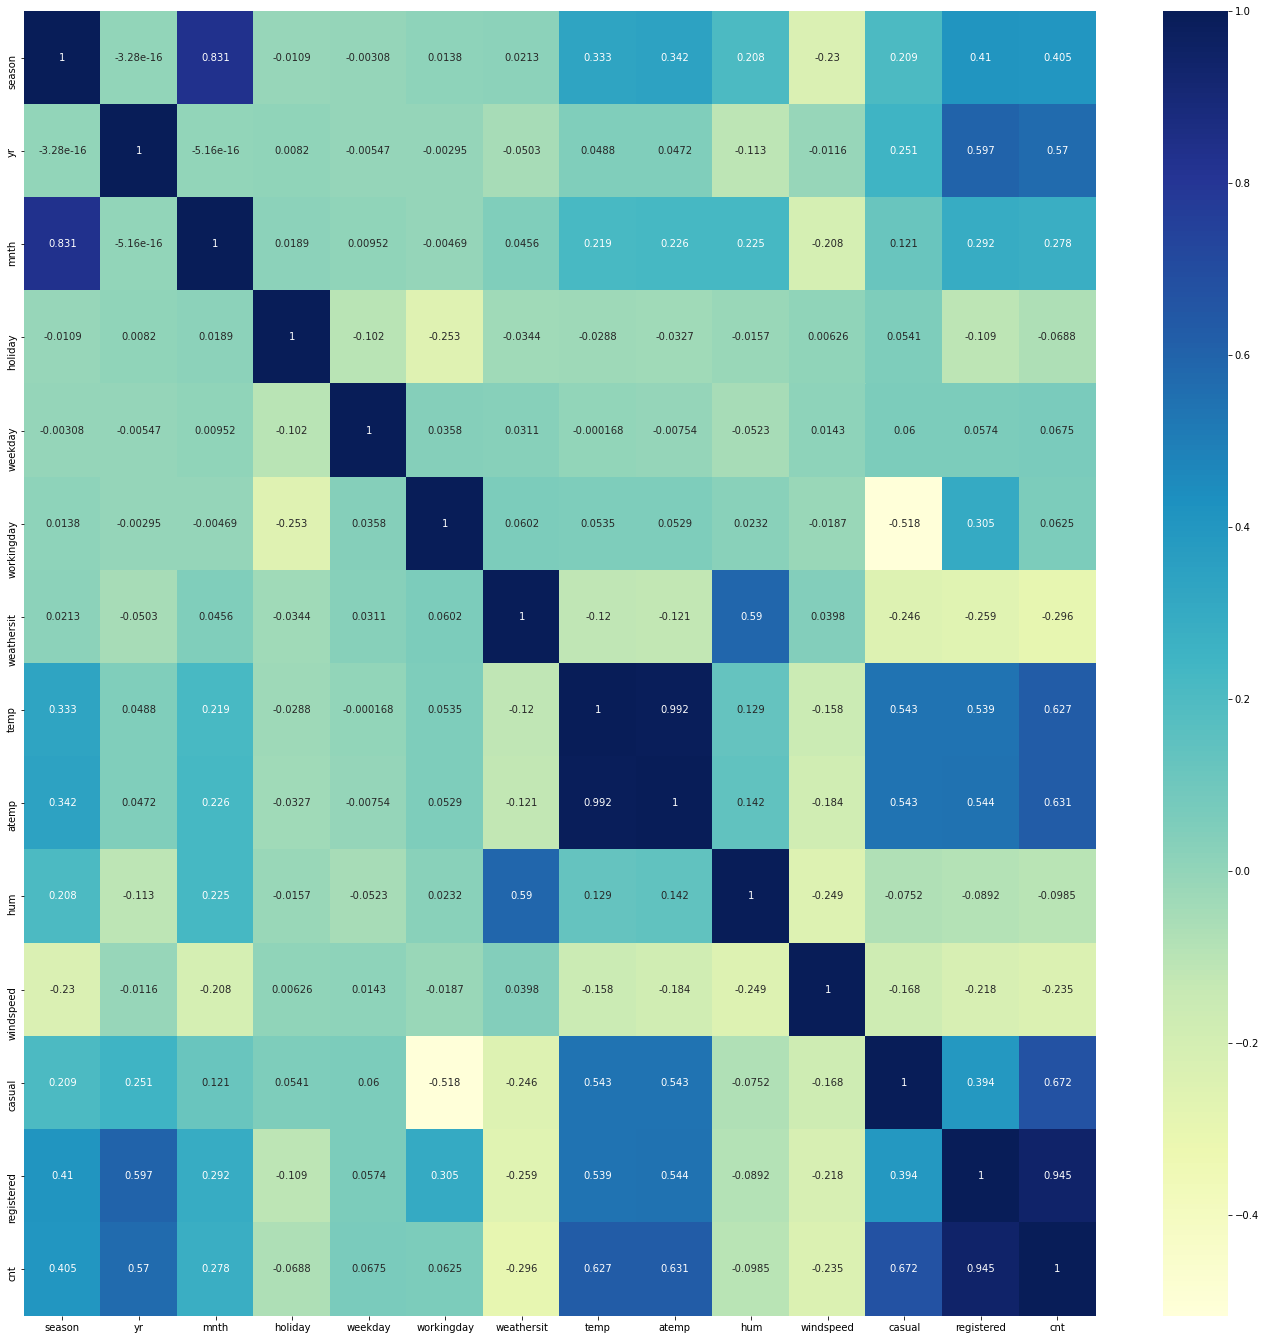

In [8]:
plt.figure(figsize = (24, 24))
sns.heatmap(bike_df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

### Observations from above heat map:
#### 1) Apart from casual and registered, atemp is having highest correlation coefficient with cnt followed by temp.
#### 2) season is correlated with cnt. correlation coefficeint is fine. 
#### 3) yr is also corrleated with cnt.
#### 4) mnth correlation coefficient is on low side. 
#### 5) holiday is negatively correlated with cnt. 
#### 6) need to check the statistical significance for weekday, workingday, weathersit, hum and windspeed.

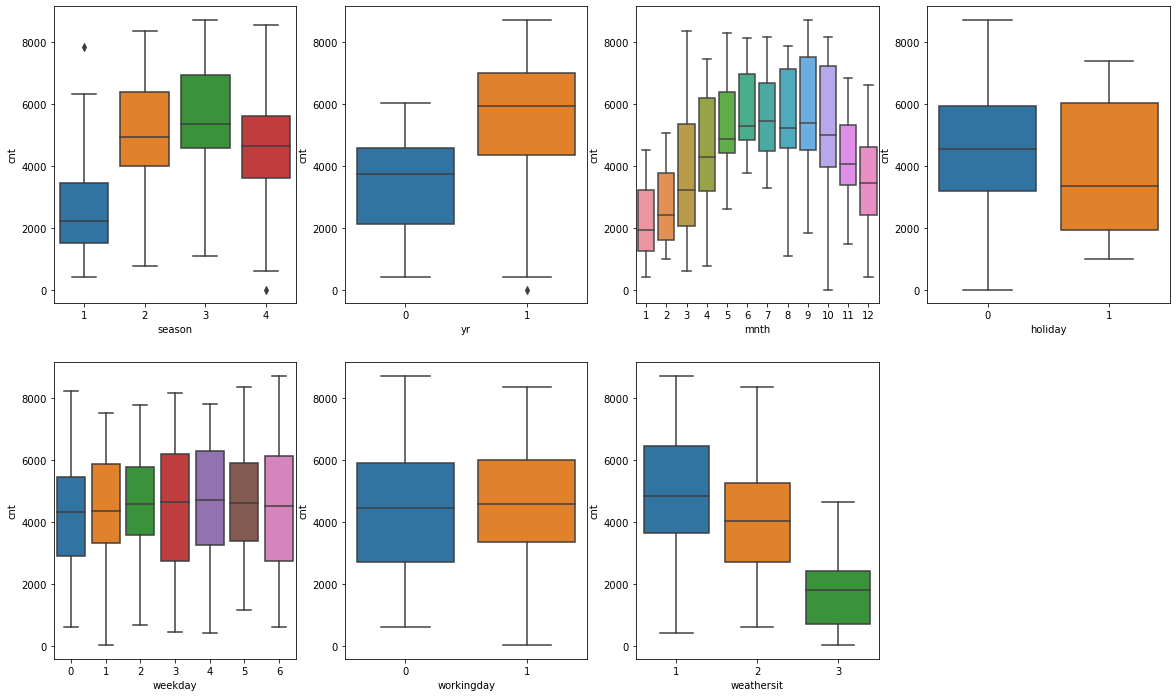

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

In [10]:
def mapping_season_col(x):
    return x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

def mapping_weathersit_col(x):
    return x.map({1:"weathersit_1", 2:"weathersit_2", 3:"weathersit_3", 4:"weathersit_4"})

def mapping_month_col(x):
    return x.map({1:"month_1", 
                  2:"month_2", 
                  3:"month_3", 
                  4:"month_4",
                  5:"month_5",
                  6:"month_6",
                  7:"month_7",
                  8:"month_8",
                  9:"month_9",
                  10:"month_10",
                  11:"month_11",
                  12:"month_12"})

def mapping_weekday_col(x):
    return x.map({0:"Monday", 
                  1:"Tuesday", 
                  2:"Wednesday", 
                  3:"Thursday",
                  4:"Friday",
                  5:"Saturday",
                  6:"Sunday"})

bike_df[["season"]] = bike_df[["season"]].apply(mapping_season_col)
bike_df[["weathersit"]] = bike_df[["weathersit"]].apply(mapping_weathersit_col)
bike_df[["mnth"]] = bike_df[["mnth"]].apply(mapping_month_col)
bike_df[["weekday"]] = bike_df[["weekday"]].apply(mapping_weekday_col)

In [11]:
season_dummy_var = pd.get_dummies(bike_df["season"], drop_first = True)

In [12]:
season_dummy_var.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
weathersit_dummy_var = pd.get_dummies(bike_df["weathersit"],drop_first = True)

In [14]:
weathersit_dummy_var.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [15]:
mnth_dummy_var = pd.get_dummies(bike_df["mnth"],drop_first = True)

In [16]:
mnth_dummy_var.head()

,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [17]:
weekday_dummy_var = pd.get_dummies(bike_df["weekday"],drop_first = True)

In [18]:
weekday_dummy_var.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [19]:
bike_df = pd.concat([bike_df, season_dummy_var, weathersit_dummy_var, mnth_dummy_var, weekday_dummy_var], axis = 1)

In [20]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,month_1,0,Sunday,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,spring,0,month_1,0,Monday,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,spring,0,month_1,0,Tuesday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,spring,0,month_1,0,Wednesday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,spring,0,month_1,0,Thursday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
drop_these_columns_2 = ["season","weathersit","mnth","weekday","casual","registered"]
bike_df.drop(drop_these_columns_2, inplace=True, axis=1)
bike_df.shape

(730, 30)

In [22]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
bike_df.shape

(730, 30)

In [24]:
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [26]:
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [27]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [28]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412,0.086275,0.086275,0.084314,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124,0.281045,0.281045,0.278131,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

### Building Own model

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('month_10', False, 2),
 ('month_11', False, 7),
 ('month_12', False, 8),
 ('month_2', False, 5),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 9),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 6),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 11)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'weathersit_2', 'weathersit_3', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_8', 'month_9', 'Monday', 'Sunday'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_7', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [34]:
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [35]:
X_train_rfe = X_train[col]

In [36]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [38]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.43e-189
Time:                        19:21:43   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2032      0.027      7.527   

### Checking VIF

In [39]:
calculate_VIF(col,X_train)

,Features,VIF
2,workingday,48.19
17,Sunday,11.61
16,Monday,11.23
6,spring,4.11
3,temp,3.35
7,winter,3.18
1,holiday,2.81
4,hum,1.94
11,month_4,1.83
14,month_8,1.77


## Model 2

In [40]:
X_train_new = X_train[col].drop(["holiday"], axis = 1)

In [41]:
X_train_lm = sm.add_constant(X_train_new)

In [42]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [43]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.43e-189
Time:                        19:21:43   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1918      0.041      4.634   

In [44]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
3,hum,30.95
2,temp,18.34
1,workingday,18.20
4,windspeed,4.96
16,Sunday,4.85
15,Monday,4.70
5,spring,4.15
6,winter,3.58
7,weathersit_2,2.30
0,yr,2.10


## Model 3

In [45]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [46]:
X_train_lm = sm.add_constant(X_train_new)

In [47]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()

In [48]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.29e-187
Time:                        19:21:43   Log-Likelihood:                 511.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     493   BIC:                            -917.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1133      0.037      3.090   

In [49]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
1,workingday,15.27
2,temp,13.40
3,windspeed,4.87
15,Sunday,4.23
14,Monday,3.98
4,spring,3.47
5,winter,2.86
0,yr,2.09
12,month_8,1.94
9,month_4,1.74


## Model 4

In [50]:
X_train_new = X_train_new.drop(["Monday"], axis = 1)

In [51]:
X_train_lm = sm.add_constant(X_train_new)

In [52]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()

In [53]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.06e-187
Time:                        19:21:43   Log-Likelihood:                 510.04
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     494   BIC:                            -920.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1554      0.028      5.488   

In [54]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,7.85
3,windspeed,4.72
1,workingday,4.64
4,spring,2.35
5,winter,2.10
0,yr,2.09
12,month_8,1.92
14,Sunday,1.83
11,month_6,1.66
10,month_5,1.62


## Model 5

In [55]:
X_train_new = X_train_new.drop(["month_8"], axis = 1)

In [56]:
X_train_lm = sm.add_constant(X_train_new)

In [57]:
lm_5 = sm.OLS(y_train,X_train_lm).fit()

In [58]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.24e-187
Time:                        19:21:44   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     495   BIC:                            -919.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1650      0.028      5.843   

In [59]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,6.15
3,windspeed,4.72
1,workingday,4.60
4,spring,2.20
0,yr,2.09
13,Sunday,1.81
5,winter,1.75
6,weathersit_2,1.56
9,month_4,1.41
11,month_6,1.35


## Model 6

In [60]:
X_train_new = X_train_new.drop(["month_6"], axis = 1)

In [61]:
X_train_lm = sm.add_constant(X_train_new)

In [62]:
lm_6 = sm.OLS(y_train,X_train_lm).fit()

In [63]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.56e-187
Time:                        19:21:46   Log-Likelihood:                 504.13
No. Observations:                 510   AIC:                            -980.3
Df Residuals:                     496   BIC:                            -921.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1727      0.028      6.140   

In [64]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,5.68
3,windspeed,4.69
1,workingday,4.59
4,spring,2.15
0,yr,2.09
12,Sunday,1.81
5,winter,1.65
6,weathersit_2,1.56
9,month_4,1.35
8,month_3,1.29


## Model 7

In [65]:
X_train_new = X_train_new.drop(["Sunday"], axis = 1)

In [66]:
X_train_lm = sm.add_constant(X_train_new)

In [67]:
lm_7 = sm.OLS(y_train,X_train_lm).fit()

In [68]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.04e-183
Time:                        19:21:47   Log-Likelihood:                 493.37
No. Observations:                 510   AIC:                            -960.7
Df Residuals:                     497   BIC:                            -905.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2059      0.028      7.423   

In [69]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,4.80
3,windspeed,4.64
1,workingday,3.00
0,yr,2.09
4,spring,2.03
5,winter,1.58
6,weathersit_2,1.54
9,month_4,1.34
8,month_3,1.28
10,month_5,1.26


### 1. Model 7 is our final model.
### 2. R-Squared value 0.832 and adjusted R-Squared value is 0.828.
### 3. All VIFs are now below 5. 
### 4. All p-values are below 0.05 (Rejecting the NULL hypothesis)

In [70]:
y_train_cnt = lm_7.predict(X_train_lm)

In [71]:
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.09196589350029502

In [72]:
%matplotlib inline

Text(0.5, 0, 'Errors')

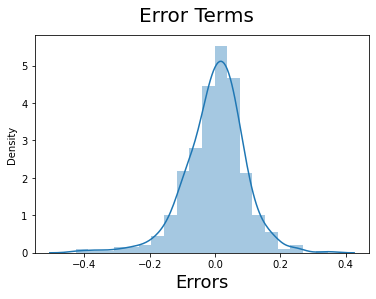

In [73]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                       

## Looking for patterns in the residuals

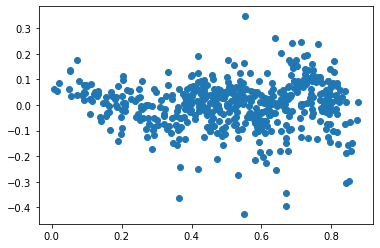

In [74]:
plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

Based on the plot above, it is evident that the residuals (or error terms) exhibit independence. This implies that there is no discernible correlation between the residuals and the predicted values, nor among the residuals themselves.

#### Applying the scaling on the test sets

In [75]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [76]:
bike_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [77]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [78]:
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [79]:
y_pred = lm_7.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

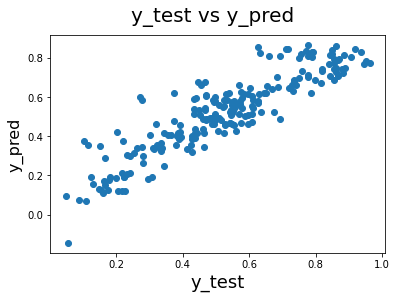

In [80]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09576593186119745

In [82]:
R2 = r2_score(y_test, y_pred)
R2

0.8069068816299572

In [83]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.7956587388122848

In [84]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.04e-183
Time:                        19:21:56   Log-Likelihood:                 493.37
No. Observations:                 510   AIC:                            -960.7
Df Residuals:                     497   BIC:                            -905.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2059      0.028      7.423   


We can see that the equation of our best fitted line is:

$ cnt = 0.205947 + 0.234120 \times  yr + 0.021870  \times  workingday + 0.449452 \times temp - 0.148696 \times windspeed - 0.092775 \times spring + 0.077122 \times winter - 0.079888 \times weathersit_2 - 0.287815 \times weathersit_3 + 0.051687 \times month_3 + 0.042965 \times month_4 + 0.054176 \times month_5 + 0.079989 \times month_9 $


In [85]:
summary_df = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[0.832,0.828,0.09196],
                         "Test Set":[0.8069,0.7956,0.09576]})

In [86]:
summary_df

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.83200,0.80690
1,Adjusted R-Squared Value,0.82800,0.79560
2,RMSE,0.09196,0.09576


following are the predictor variables:
1) yr
2) workingday
3) temp
4) windspeed
5) spring
6) winter
7) weathersit_2
8) weathersit_3
9) month_3
10) month_4
11) month_5
12) month_9

Therefore, the company should consider the aforementioned predictor variables when preparing their bike rental strategy.